# Nome: Henrico Nardelli Bela
## RM: 95985
## Turma: 2TIAR

---

# Clusterizacao - Case ImdbMovies

# IMDb TOP 250 Movies
![An image](https://static.amazon.jobs/teams/53/images/IMDb_Header_Page.jpg?1501027252)

**Este projeto consiste em treinar um sistema de recomendação de filmes utilizando as informações referentes aos top 250 filmes melhor avaliados pelo público na plataforma IMDb.**
*   A extração dos dados será feita por técnicas de web scraping (crawler).
*   O objetivo principal será agrupar os 250 filmes em "n" clusters classificados a partir das suas sinopses, aplicando técnicas de processamento de texto e algoritmos de clusterização.
*   Ao final, teremos um sistemas de recomendação baseado na similaridade das sinopses, e não apenas dos generos.

**Exemplo de aplicação prática: usuários receberão recomendações de filmes que estejam no mesmo cluster de sinopses de outros filmes que ele já tenha curtido.**

# Import das bibliotecas

In [159]:
import pandas as pd
import numpy as np
import requests
from pprint import pprint
from bs4 import BeautifulSoup
import re
import json
from urllib.request import Request, urlopen
from lxml import html
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from PIL import Image
from io import BytesIO
import cv2
from unicodedata import normalize
import string
from nltk.stem import PorterStemmer

# Web Scraping / Crawler

In [160]:
# userAgents=[
#     "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/74.0.3729.157 Safari/537.36",
#     "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15"]

# url = 'https://www.imdb.com/chart/top/?ref_=nv_mv_250'
# response = requests.get(url, headers={"User-agent": userAgents[1]})
# response

In [161]:
# userAgents=[
#     "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/74.0.3729.157 Safari/537.36",
#     "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15"]

# url = 'https://www.imdb.com/chart/moviemeter/?ref_=chtbo_ql_2'
# response = requests.get(url, headers={"User-agent": userAgents[1]})
# response

In [162]:
userAgents=[
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/74.0.3729.157 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15"]

url = 'https://www.imdb.com/chart/boxoffice/'
response = requests.get(url, headers={"User-agent": userAgents[1]})
response

<Response [200]>

In [163]:
html = response.text
html

'<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === \'function\'){ uet(\'bb\', \'LoadTitle\', {wb: 1}); }</script><script>window.addEventListener(\'load\', (event) => {\n        if (typeof window.csa !== \'undefined\' && typeof window.csa === \'function\') {\n            var csaLatencyPlugin = window.csa(\'Content\', {\n                element: {\n                    slotId: \'LoadTitle\',\n                    type: \'service-call\'\n                }\n            });\n            csaLatencyPlugin(\'mark\', \'clickToBodyBegin\', 1693005425365);\n        }\n    })</script><title>Top Box Office (US)</title><meta name="description" content="Weekend of August 18-20" data-id="main"/><meta property="og:site_name" content="IMDb"/><meta property="og:title" content="Top Box Office (US)"/><meta property="og:descript

In [164]:
#BeautifulSoup
bs = BeautifulSoup(html)
pprint(bs)


<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1693005425365);
        }
    })</script><title>Top Box Office (US)</title><meta content="Weekend of August 18-20" data-id="main" name="description"/><meta content="IMDb" property="og:site_name"/><meta content="Top Box Office (US)" property="og:title"/><meta content="Weekend of August 18-20" property="og:descri

## Title EN

In [165]:
titles = bs.find_all('h3', attrs={'class': 'ipc-title__text'})
titles

[<h3 class="ipc-title__text">IMDb Charts</h3>,
 <h3 class="ipc-title__text">1. Besouro Azul</h3>,
 <h3 class="ipc-title__text">2. Barbie</h3>,
 <h3 class="ipc-title__text">3. Oppenheimer</h3>,
 <h3 class="ipc-title__text">4. As Tartarugas Ninja: Caos Mutante</h3>,
 <h3 class="ipc-title__text">5. Ruim Pra Cachorro</h3>,
 <h3 class="ipc-title__text">6. Megatubarão 2</h3>,
 <h3 class="ipc-title__text">7. Fale Comigo</h3>,
 <h3 class="ipc-title__text">8. Mansão Mal-Assombrada</h3>,
 <h3 class="ipc-title__text">9. Missão: Impossível - Acerto de Contas Parte Um</h3>,
 <h3 class="ipc-title__text">10. Som da Liberdade</h3>,
 <h3 class="ipc-title__text">You have rated</h3>,
 <h3 class="ipc-title__text">More to explore</h3>,
 <h3 class="ipc-title__text">Charts</h3>,
 <h3 class="ipc-title__text">Most Popular Movies<svg class="ipc-icon ipc-icon--chevron-right-inline ipc-icon--inline ipc-title-link ipc-title-link-chevron" fill="currentColor" height="24" role="presentation" viewbox="0 0 24 24" width

In [166]:
list_title_en = []
for x in titles[1:-12]:
  tit = (x.text).split(">")[0].strip()
  list_title_en.append(tit)

display(len(list_title_en))
list_title_en[:5]

10

['1. Besouro Azul',
 '2. Barbie',
 '3. Oppenheimer',
 '4. As Tartarugas Ninja: Caos Mutante',
 '5. Ruim Pra Cachorro']

## Year

In [167]:
list_years = []
years = bs.find_all('div', attrs={'class':'cli-title-metadata'})
for y in years:
  year = y.find('span', attrs={'class':'cli-title-metadata-item'}).text
  list_years.append(year)
display(len(list_years))
list_years[:5]

0

[]

## Rating

In [168]:
ratings = bs.find_all('div', attrs={'class':'cli-ratings-container'})
list_rating = []
for r in ratings:
  rating = r.find('span').text
  list_rating.append(rating)

display(len(list_rating))
pprint(list_rating[:5])

10

['6.8\xa0(17K)',
 '7.4\xa0(255K)',
 '8.6\xa0(381K)',
 '7.5\xa0(19K)',
 '6.4\xa0(3.2K)']


In [169]:
image_links = bs.find_all("div", attrs ={"class":"ipc-media__img"})
list_images = []
for i in image_links:
    images = i.find("img").get("src")
    list_images.append(images)

In [170]:
list_images[:5]

['https://m.media-amazon.com/images/M/MV5BNjliMTY1OWUtOWZjZi00MjQ3LWJmODktY2RkMzNiOWU2M2UxXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,0,140,207_.jpg',
 'https://m.media-amazon.com/images/M/MV5BZGExZWM4YzItMDkyNS00ZWRlLWJjY2UtMTE1Mjg2YmJiYzEzXkEyXkFqcGdeQXVyNTk2MDQ0MjA@._V1_QL75_UX140_CR0,0,140,207_.jpg',
 'https://m.media-amazon.com/images/M/MV5BMjg4OTkxNzUtOGQ0My00MzQxLWIyZmItMzIyY2FlZTRhMDcxXkEyXkFqcGdeQXVyMTA3MDk2NDg2._V1_QL75_UX140_CR0,7,140,207_.jpg',
 'https://m.media-amazon.com/images/M/MV5BZDZjZTc2MjgtNjA4Ny00YmEzLWE5OWMtMTgxMWUzZTdmZmMxXkEyXkFqcGdeQXVyMTEzNTE3MjE4._V1_QL75_UX140_CR0,0,140,207_.jpg',
 'https://m.media-amazon.com/images/M/MV5BNWE0MWJkN2QtZDgzNS00MmU1LTljZGItYzA1MzEyOWU4Y2NlXkEyXkFqcGdeQXVyMDM2NDM2MQ@@._V1_QL75_UX140_CR0,21,140,207_.jpg']

In [171]:
image_arrays = []
for img_url in list_images:
    if img_url:
        img_response = requests.get(img_url)
        if img_response.status_code == 200:
            img_bytes = BytesIO(img_response.content)
            img_pil = Image.open(img_bytes).convert("L")
            img_np = np.array(img_pil)
            image_arrays.append(img_np)

In [172]:
len(image_arrays)

10

In [173]:
image = Image.fromarray(image_arrays[2])
image.show()

## Genre, Title PT & Year

In [174]:
list_links = []
for a in bs.find_all('a', href=True):
  if '/title/' in a['href'] and 'https://www.imdb.com/'+ a['href'] not in list_links:
    list_links.append(('https://www.imdb.com/'+a['href'])[:-15])

#Remove duplicates
list_links = list(dict.fromkeys(list_links))
#Deleting first element
list_links = list_links[1:]

display(len(list_links))
list_links[:5]

10

['https://www.imdb.com//title/tt9362930/',
 'https://www.imdb.com//title/tt1517268/',
 'https://www.imdb.com//title/tt15398776/',
 'https://www.imdb.com//title/tt8589698/',
 'https://www.imdb.com//title/tt15153532/']

In [175]:
headers = {
          'authority': 'www.amazon.com.br',
          'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
          'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
          'cache-control': 'max-age=0',
          'device-memory': '8',
          'downlink': '10',
          'dpr': '1.875',
          'ect': '4g',
          'rtt': '50',
          'sec-ch-device-memory': '8',
          'sec-ch-dpr': '1.875',
          'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
          'sec-ch-ua-mobile': '?0',
          'sec-ch-ua-platform': '"Windows"',
          'sec-ch-ua-platform-version': '"10.0.0"',
          'sec-ch-viewport-width': '455',
          'sec-fetch-dest': 'document',
          'sec-fetch-mode': 'navigate',
          'sec-fetch-site': 'none',
          'sec-fetch-user': '?1',
          'upgrade-insecure-requests': '1',
          'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
          'viewport-width': '455',
          }
############################################################
list_genre = []
list_title_pt = []
list_year = []
list_sinopse = []

for link in list_links:
  time.sleep(.5)
  response = requests.get(link, headers = headers)
  html = response.content
  soup = BeautifulSoup(html, "html.parser")

  #genre
  try:
    for genre in soup.find('span', {'class':'ipc-chip__text'}):
      genre = genre.text
      list_genre.append(genre)
  except:
      list_genre.append(np.nan)
      print('Nan')

  #title_PT and year
  try:
    for x in soup.find('title'):
      #title_pt
      title_pt = (x.text)[:-14].strip()
      list_title_pt.append(title_pt)
      #year
      year = (x.text)[-12:-8].strip()
      list_year.append(year)

  except:
    list_title_pt.append(np.nan)
    list_year.append(np.nan)

  #sinopse
  try:
    for sin in soup.find('span', {"data-testid":"plot-xl"}):
      sinopse = sin.text
      list_sinopse.append(sinopse)
  except:
    list_sinopse.append(np.nan)

  print(genre, title_pt, year, sinopse[:20])

display(len(list_genre), len(list_title_pt), len(list_year), len(list_sinopse))
print(list_genre[:5])
print(list_title_pt[:5])
print(list_year[:5])
display(list_sinopse[:2])

Ação Besouro Azul 2023 Jaime Reyes, um adol
Aventura Barbie 2023 Viver na Terra da Ba
Biografia Oppenheimer 2023 A história do cienti
Animação As Tartarugas Ninja: Caos Mutante 2023 Os irmãos Tartaruga 
Animação Ruim Pra Cachorro 2023 Um cachorro abandona
Ação Megatubarão 2 2023 Segue um piloto de s
Terror Fale Comigo 2022 Um grupo de amigos d
Comédia Mansão Mal-Assombrada 2023 Uma mãe e seu filho 
Ação Missão: Impossível - Acerto de Contas Parte Um 2023 Ethan Hunt e seu gru
Ação Som da Liberdade 2023 A incrível história 


10

10

10

10

['Ação', 'Aventura', 'Biografia', 'Animação', 'Animação']
['Besouro Azul', 'Barbie', 'Oppenheimer', 'As Tartarugas Ninja: Caos Mutante', 'Ruim Pra Cachorro']
['2023', '2023', '2023', '2023', '2023']


['Jaime Reyes, um adolescente de origem mexicana que encontra um artefato alienígena que lhe dá um exoesqueleto mecanizado e poderes, tornando-o no Besouro Azul.',
 'Viver na Terra da Barbie é ser um ser perfeito em um lugar perfeito. A menos que você tenha uma crise existencial completa. Ou que você seja um Ken.']

## DataFrame

In [176]:
len(list_title_pt)

10

In [177]:
len(list_title_en)

10

In [178]:
len(list_year)

10

In [179]:
len(list_rating)

10

In [180]:
len(list_genre)

10

In [181]:
len(list_sinopse)

10

In [182]:
len(image_arrays)

10

In [183]:
# img_array_resized = [cv2.resize(img, (64,64)) for img in image_arrays]

In [184]:
# image_arrays_flat = [img.flatten() for img in img_array_resized]

In [185]:
# img_array = np.array(image_arrays_flat)

In [186]:
# img_array.shape

In [187]:
# Image.fromarray(img_array_resized[0]).show()

In [188]:
#completar
df = pd.DataFrame({'title_pt': list_title_pt,
                   'title_en': list_title_en,
                   'year': list_year,
                   'rating':list_rating,
                   'genre': list_genre,
                   'sinopse': list_sinopse}, 
                #    'poster_array': image_arrays},
                   )

display(df.head())

title_pt                              title_en  \
0                       Besouro Azul                       1. Besouro Azul   
1                             Barbie                             2. Barbie   
2                        Oppenheimer                        3. Oppenheimer   
3  As Tartarugas Ninja: Caos Mutante  4. As Tartarugas Ninja: Caos Mutante   
4                  Ruim Pra Cachorro                  5. Ruim Pra Cachorro   

   year      rating      genre  \
0  2023   6.8 (17K)       Ação   
1  2023  7.4 (255K)   Aventura   
2  2023  8.6 (381K)  Biografia   
3  2023   7.5 (19K)   Animação   
4  2023  6.4 (3.2K)   Animação   

                                             sinopse  
0  Jaime Reyes, um adolescente de origem mexicana...  
1  Viver na Terra da Barbie é ser um ser perfeito...  
2  A história do cientista americano J. Robert Op...  
3  Os irmãos Tartaruga trabalham para conquistar ...  
4  Um cachorro abandonado se une a outros vira-la...

In [189]:

def criar_colunas_por_pixel(array_imagem):
    num_linhas, num_colunas = array_imagem.shape
    colunas = {}
    for i in range(num_colunas):
        for j in range(num_linhas):
            coluna_nome = f'pixel_{i}_{j}'
            colunas[coluna_nome] = array_imagem[j, i]
    return pd.Series(colunas)

# df_cols_img = df['poster_array'].apply(criar_colunas_por_pixel)



In [190]:
# df_cols_img

In [191]:
# df = pd.concat([df, df_cols_img], axis = 1)
# df.drop(columns = ["poster_array"], inplace = True)

In [192]:
df

title_pt  \
0                                    Besouro Azul   
1                                          Barbie   
2                                     Oppenheimer   
3               As Tartarugas Ninja: Caos Mutante   
4                               Ruim Pra Cachorro   
5                                   Megatubarão 2   
6                                     Fale Comigo   
7                           Mansão Mal-Assombrada   
8  Missão: Impossível - Acerto de Contas Parte Um   
9                                Som da Liberdade   

                                            title_en  year      rating  \
0                                    1. Besouro Azul  2023   6.8 (17K)   
1                                          2. Barbie  2023  7.4 (255K)   
2                                     3. Oppenheimer  2023  8.6 (381K)   
3               4. As Tartarugas Ninja: Caos Mutante  2023   7.5 (19K)   
4                               5. Ruim Pra Cachorro  2023  6.4 (3.2K)   
5                                   6. Megatubarão 2  2023   5.4 (21K)   
6                                     7. Fale Comigo  2022   7.4 (25K)   
7                           8. Mansão Mal-Assombrada  2023   6.2 (11K)   
8  9. Missão: Impossível - Acerto de Contas Parte Um  2023  8.0 (131K)   
9                               10. Som da Liberdade  2023   7.8 (49K)   

       genre                                            sinopse  
0       Ação  Jaime Reyes, um adolescente de origem mexicana...  
1   Aventura  Viver na Terra da Barbie é ser um ser perfeito...  
2  Biografia  A história do cientista americano J. Robert Op...  
3   Animação  Os irmãos Tartaruga trabalham para conquistar ...  
4   Animação  Um cachorro abandonado se une a outros vira-la...  
5       Ação  Segue um piloto de submersível e um grupo de c...  
6     Terror  Um grupo de amigos descobre uma mão embalsamad...  
7    Comédia  Uma mãe e seu filho de nove anos estão tentand...  
8       Ação  Ethan Hunt e seu grupo do IMF embarcam na miss...  
9       Ação  A incrível história real de um ex-agente gover...

# Export df to csv

In [193]:
from datetime import datetime
today = datetime.today().strftime('%Y%m%d')
today

'20230825'

In [194]:
# path_to_export = '/home/henrico/Github/Python/Faculdade/FIAP/Segundo_ano/2o_semestre/AUTOML/Clustering/ck1/raw_data'
path_to_export = "/Users/henricobela/Desktop/Estudos/Github/Python/Faculdade/FIAP/Segundo_ano/2o_semestre/AUTOML/Clustering/atividade_clustering/raw_data"
df.to_csv(f'{path_to_export}/top250_movies_{today}.csv', sep = ';',index = False)

# Merge with historical data

In [195]:
#Merge with historical data
from glob import glob

#loading MES
list_files = []
for file in glob(path_to_export + '/*.csv'):
    list_files.append(file)

#appending each tag file in a list
list_df = []
c = 0
for file in list_files:
    print(f'{c+1} of {len(list_files)} | {file}')
    df_temp = pd.read_csv(  file, sep = ';')
    list_df.append(df_temp)
    c += 1

#mergin all files
df_historical = pd.concat(list_df, axis = 0, copy = False)
df_historical = df_historical.drop_duplicates(subset=['title_pt'])
df_historical = df_historical.reset_index(drop = True)
display(df_historical.shape)
display(df_historical)

1 of 6 | /Users/henricobela/Desktop/Estudos/Github/Python/Faculdade/FIAP/Segundo_ano/2o_semestre/AUTOML/Clustering/atividade_clustering/raw_data/top250_movies_20230821.csv


2 of 6 | /Users/henricobela/Desktop/Estudos/Github/Python/Faculdade/FIAP/Segundo_ano/2o_semestre/AUTOML/Clustering/atividade_clustering/raw_data/top250_movies_20230822.csv
3 of 6 | /Users/henricobela/Desktop/Estudos/Github/Python/Faculdade/FIAP/Segundo_ano/2o_semestre/AUTOML/Clustering/atividade_clustering/raw_data/top250_movies_20230818.csv
4 of 6 | /Users/henricobela/Desktop/Estudos/Github/Python/Faculdade/FIAP/Segundo_ano/2o_semestre/AUTOML/Clustering/atividade_clustering/raw_data/top250_movies_20230825.csv
5 of 6 | /Users/henricobela/Desktop/Estudos/Github/Python/Faculdade/FIAP/Segundo_ano/2o_semestre/AUTOML/Clustering/atividade_clustering/raw_data/all_movies.csv


/var/folders/0x/lgbrscr56sq1gtx792kyzgvc0000gn/T/ipykernel_1204/934347989.py:14: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



6 of 6 | /Users/henricobela/Desktop/Estudos/Github/Python/Faculdade/FIAP/Segundo_ano/2o_semestre/AUTOML/Clustering/atividade_clustering/raw_data/top250_movies_20230818_b.csv


(335, 28988)

title_pt                           title_en  year  \
0             Um Sonho de Liberdade           1. Um Sonho de Liberdade  1994   
1                 O Poderoso Chefão               2. O Poderoso Chefão  1972   
2    Batman: O Cavaleiro das Trevas  3. Batman: O Cavaleiro das Trevas  2008   
3              O Poderoso Chefão II            4. O Poderoso Chefão II  1974   
4          12 Homens e uma Sentença        5. 12 Homens e uma Sentença  1957   
..                              ...                                ...   ...   
330                Duna: Parte Dois                   Duna: Parte Dois  2024   
331                    O Rei Macaco                       O Rei Macaco  2023   
332                         Dunkirk                            Dunkirk  2017   
333            Guardiões da Galáxia               Guardiões da Galáxia  2014   
334                         Titanic                            Titanic  1997   

         rating     genre                                            sinopse  \
0           9.3     Drama  Dois homens presos se reúnem ao longo de vário...   
1           9.2  Policial  O patriarca idoso de uma dinastia do crime org...   
2           9.0      Ação  Quando a ameaça conhecida como O Coringa surge...   
3           9.0  Policial  Em 1950, Michael Corleone, agora à frente da f...   
4           9.0  Policial  O julgamento de um assassinato em Nova Iorque ...   
..          ...       ...                                                ...   
330         NaN      Ação  Um menino se torna o Messias dos nômades em um...   
331  5.8 (2.2K)  Animação  Segue um macaco cheio de carisma e seu bastão ...   
332  7.8 (707K)      Ação  Soldados aliados da Bélgica, do Império Britân...   
333  8.0 (1.2M)      Ação  Um grupo de criminosos intergalácticos deve se...   
334  7.9 (1.2M)     Drama  Uma aristocrata de dezessete anos se apaixona ...   

     pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  ...  pixel_139_199  \
0        156.0      166.0      178.0      151.0  ...            5.0   
1        250.0      237.0      252.0      250.0  ...            9.0   
2          5.0        1.0       17.0       17.0  ...            2.0   
3        248.0      249.0      249.0      250.0  ...           38.0   
4        130.0      129.0      129.0      128.0  ...           51.0   
..         ...        ...        ...        ...  ...            ...   
330        NaN        NaN        NaN        NaN  ...            NaN   
331        NaN        NaN        NaN        NaN  ...            NaN   
332        NaN        NaN        NaN        NaN  ...            NaN   
333        NaN        NaN        NaN        NaN  ...            NaN   
334        NaN        NaN        NaN        NaN  ...            NaN   

     pixel_139_200  pixel_139_201  pixel_139_202  pixel_139_203  \
0              7.0            7.0            7.0            7.0   
1              9.0            9.0            9.0            9.0   
2              1.0           12.0            7.0            1.0   
3             40.0           39.0           37.0           36.0   
4             62.0           78.0          117.0           85.0   
..             ...            ...            ...            ...   
330            NaN            NaN            NaN            NaN   
331            NaN            NaN            NaN            NaN   
332            NaN            NaN            NaN            NaN   
333            NaN            NaN            NaN            NaN   
334            NaN            NaN            NaN            NaN   

     pixel_139_204  pixel_139_205  pixel_139_206  poster_array  poster  
0              7.0            7.0            7.0           NaN     NaN  
1              9.0            9.0            9.0           NaN     NaN  
2              3.0            6.0            1.0           NaN     NaN  
3             36.0           37.0           38.0           NaN     NaN  
4             50.0           83.0          113.0           NaN     NaN  
..       

# Export historical data

In [196]:
df_historical.to_csv(f'{path_to_export}/all_movies.csv', sep = ';',index = False)

#EDA - Exploratory Data Analysis

In [197]:
df = pd.read_csv(f'{path_to_export}/all_movies.csv', sep = ';')
df.drop(columns = ["poster", "poster_array"], inplace = True)
df = df[["title_pt", "title_en", "year", "rating", "genre", "sinopse"]]
print(df.shape)
df.head()

(335, 6)


/var/folders/0x/lgbrscr56sq1gtx792kyzgvc0000gn/T/ipykernel_1204/1328742763.py:1: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



title_pt                           title_en  year  \
0           Um Sonho de Liberdade           1. Um Sonho de Liberdade  1994   
1               O Poderoso Chefão               2. O Poderoso Chefão  1972   
2  Batman: O Cavaleiro das Trevas  3. Batman: O Cavaleiro das Trevas  2008   
3            O Poderoso Chefão II            4. O Poderoso Chefão II  1974   
4        12 Homens e uma Sentença        5. 12 Homens e uma Sentença  1957   

  rating     genre                                            sinopse  
0    9.3     Drama  Dois homens presos se reúnem ao longo de vário...  
1    9.2  Policial  O patriarca idoso de uma dinastia do crime org...  
2    9.0      Ação  Quando a ameaça conhecida como O Coringa surge...  
3    9.0  Policial  Em 1950, Michael Corleone, agora à frente da f...  
4    9.0  Policial  O julgamento de um assassinato em Nova Iorque ...

In [198]:
df["rating"][260].split("\xa0")[0]
df["rating"] = df["rating"].apply(lambda x: x.split("\xa0")[0] if not isinstance(x, float) else x)

In [199]:
# Adjusting variable types
df['year'] = df['year'].astype('int64')
df['rating'] = df['rating'].astype('float64')

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title_pt  335 non-null    object 
 1   title_en  335 non-null    object 
 2   year      335 non-null    int64  
 3   rating    328 non-null    float64
 4   genre     335 non-null    object 
 5   sinopse   335 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 15.8+ KB


In [201]:
df.describe()

year      rating
count   335.000000  328.000000
mean   1995.483582    7.924085
std      26.832239    0.858203
min    1921.000000    3.200000
25%    1979.000000    8.100000
50%    2002.000000    8.200000
75%    2019.000000    8.325000
max    2024.000000    9.300000

## Plots

In [202]:
df.genre.value_counts('d')

Ação          0.238806
Drama         0.220896
Comédia       0.125373
Policial      0.116418
Animação      0.086567
Biografia     0.074627
Aventura      0.074627
Terror        0.038806
Mistério      0.011940
Faroeste      0.002985
Filme noir    0.002985
Fantasia      0.002985
Suspense      0.002985
Name: genre, dtype: float64

In [203]:
fig = px.bar(df.genre.value_counts('d')*100,
             text_auto=True,
             title = '% de Filmes por Gênero',
             labels={'index':'Gênero',
                     'value':'% de Filmes'})
fig.show()

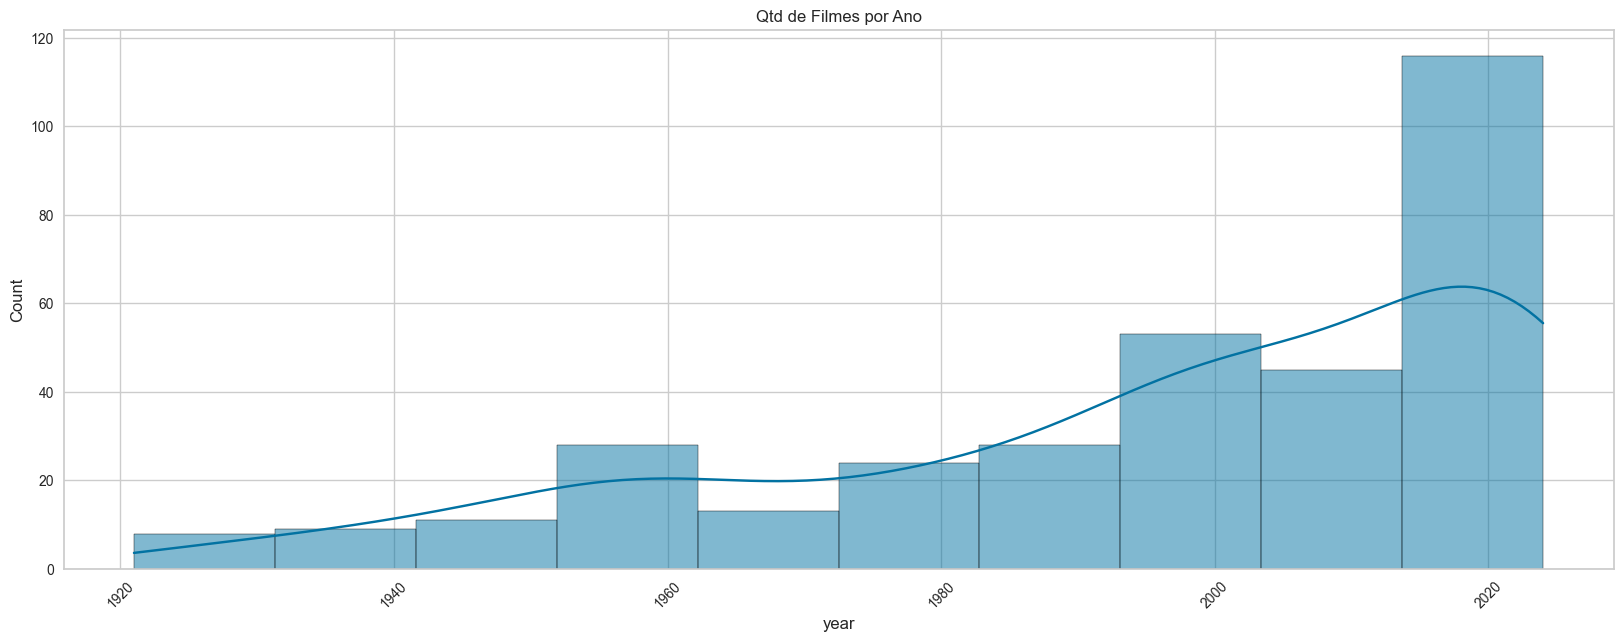

In [204]:
plt.figure(figsize = (20,7))
sns.histplot( df,
              x = 'year',
              kde = True).set_title('Qtd de Filmes por Ano')
plt.xticks(rotation=45)
plt.show()

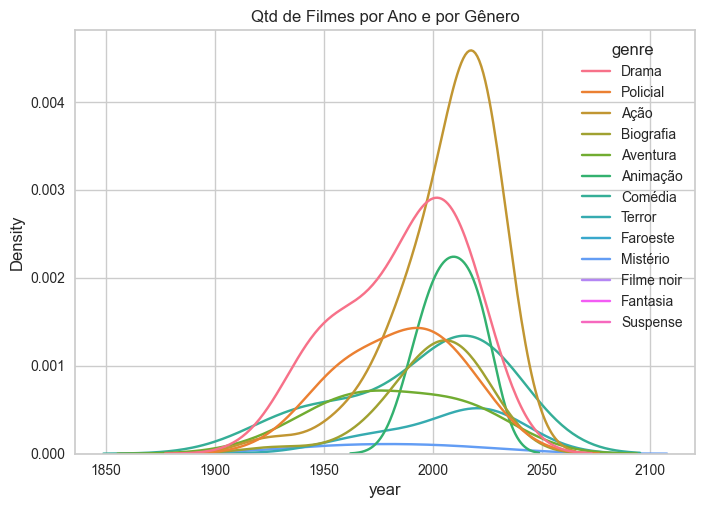

In [205]:
sns.kdeplot( df, x = 'year', hue = 'genre', bw_adjust = 1.5, warn_singular = False).set_title('Qtd de Filmes por Ano e por Gênero')
plt.show()

# Pré-processamento de texto

In [206]:
#convert sinopses to lowercase
df_processed = df.copy()
df_processed['sinopse'] = df_processed['sinopse'].str.lower()
df_processed['sinopse'].head()

0    dois homens presos se reúnem ao longo de vário...
1    o patriarca idoso de uma dinastia do crime org...
2    quando a ameaça conhecida como o coringa surge...
3    em 1950, michael corleone, agora à frente da f...
4    o julgamento de um assassinato em nova iorque ...
Name: sinopse, dtype: object

In [207]:
def qty_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [208]:
### Feature Engineering
df_processed['word_count'] = df_processed['sinopse'].apply(qty_words).astype('int64')
df_processed.head()

title_pt                           title_en  year  \
0           Um Sonho de Liberdade           1. Um Sonho de Liberdade  1994   
1               O Poderoso Chefão               2. O Poderoso Chefão  1972   
2  Batman: O Cavaleiro das Trevas  3. Batman: O Cavaleiro das Trevas  2008   
3            O Poderoso Chefão II            4. O Poderoso Chefão II  1974   
4        12 Homens e uma Sentença        5. 12 Homens e uma Sentença  1957   

   rating     genre                                            sinopse  \
0     9.3     Drama  dois homens presos se reúnem ao longo de vário...   
1     9.2  Policial  o patriarca idoso de uma dinastia do crime org...   
2     9.0      Ação  quando a ameaça conhecida como o coringa surge...   
3     9.0  Policial  em 1950, michael corleone, agora à frente da f...   
4     9.0  Policial  o julgamento de um assassinato em nova iorque ...   

   word_count  
0          21  
1          20  
2          33  
3          41  
4          29

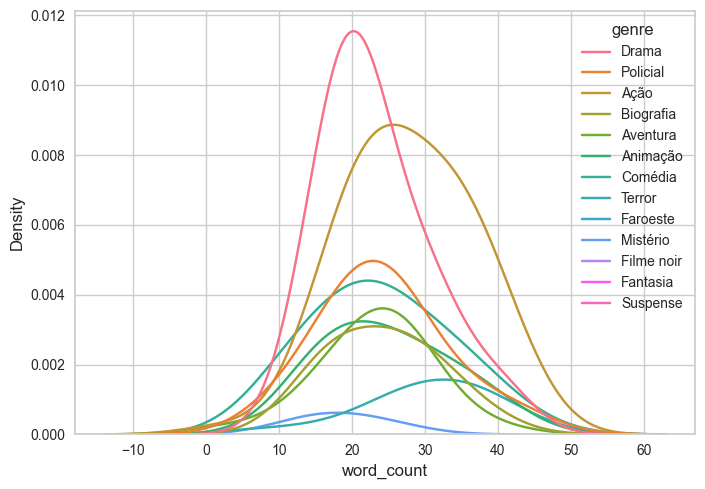

In [209]:
sns.kdeplot( df_processed, x = 'word_count', hue = 'genre', bw_adjust = 1.5, warn_singular = False)
plt.show()

## Nuvem de palavras

### Antes de remover as stopwords

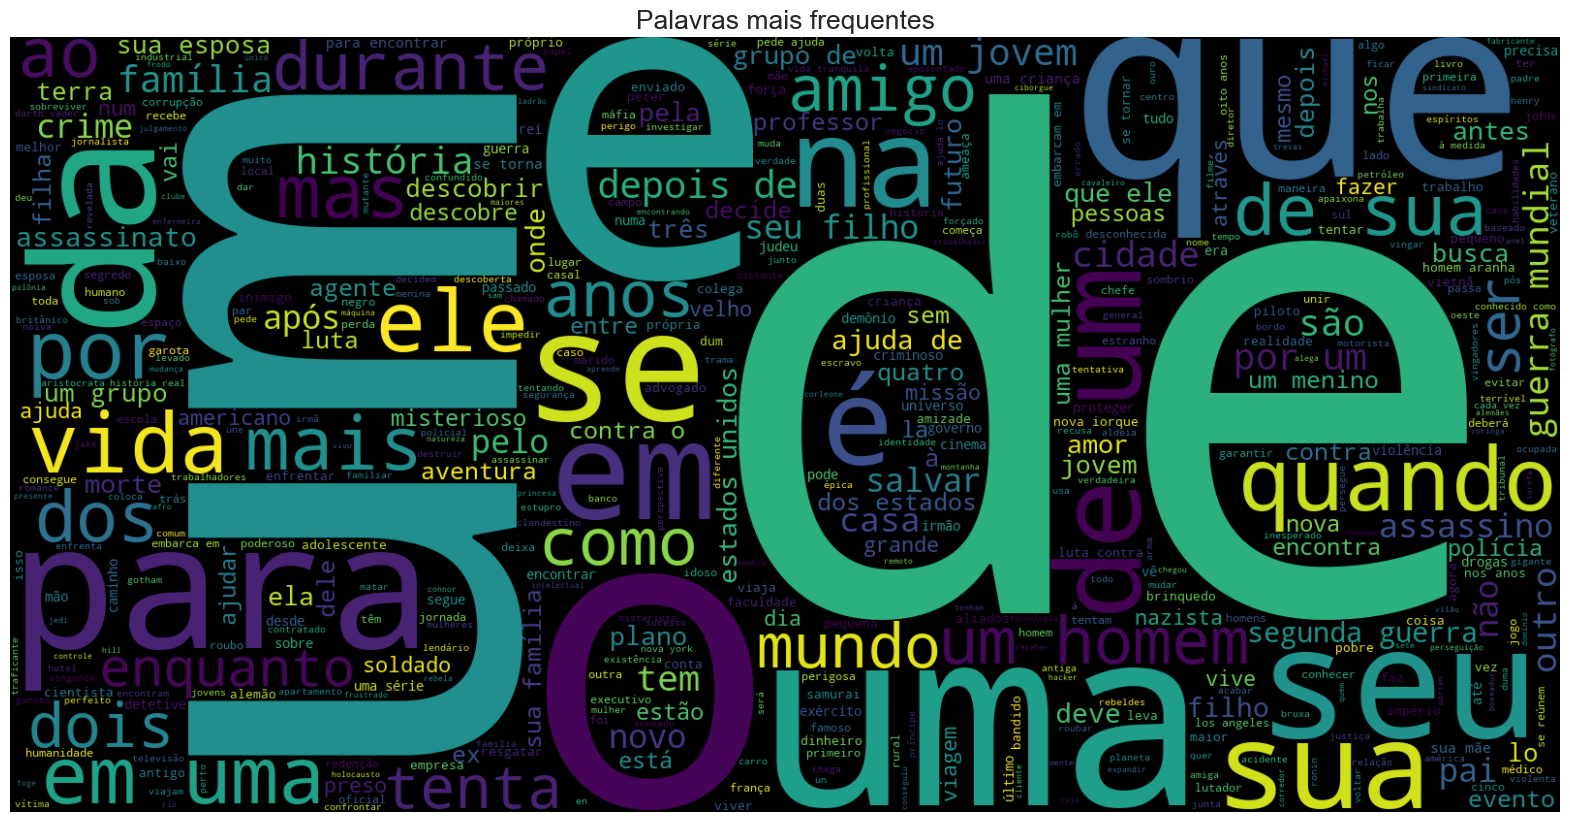

In [210]:
text = ' '.join([phrase for phrase in df_processed['sinopse']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes', fontsize = 19)
plt.show()

### Após remoção das stopwords

In [211]:
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henricobela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


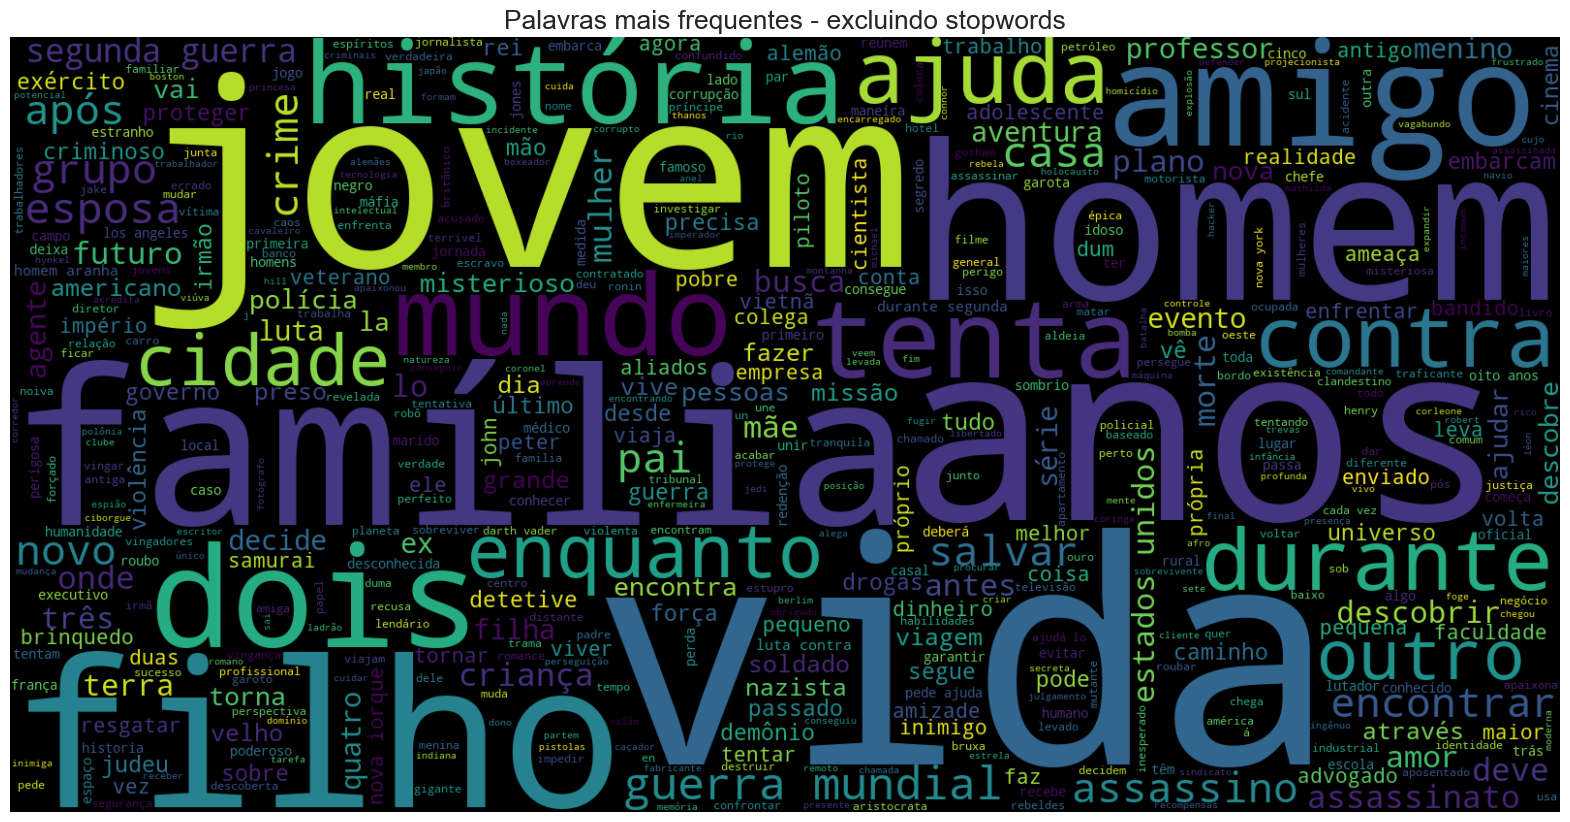

In [212]:
df_processed['sinopse_no_stopwords'] = df_processed['sinopse'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
text = ' '.join([phrase for phrase in df_processed['sinopse_no_stopwords']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes - excluindo stopwords', fontsize = 19)
plt.show()

## Aplicando TF-IDF
Term Frequency-Inverse Document Frequency

O TF-IDF define a importância de um termo levando em consideração a importância desse termo em um único documento e dimensionando-o por sua importância em todos os documentos.

In [213]:
def limpar_texto(texto):
    stemmer = PorterStemmer()
    texto = normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8').lower()
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    # palavras = texto.split()
    # stemmed_palavras = [stemmer.stem(palavra) for palavra in palavras]
    # texto_limpo = ' '.join(stemmed_palavras)
    # return texto_limpo
    return texto

In [214]:
df_processed['sinopse_no_stopwords'] = df_processed['sinopse_no_stopwords'].apply(limpar_texto)

In [215]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_processed['sinopse_no_stopwords'])

In [216]:
print(X.shape)
X.toarray()

(335, 132)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# KMeans - Clusterização

## Escolhendo o numero de "k" clusters ideal

### Método Elbow

2 302.9609615711054
3 298.57537909018055
4 293.0197366354046
5 289.34950014833043
6 282.7141012899366
7 281.3104899321069
8 277.35243319371307
9 271.7359471793266
10 267.70055018708274
11 263.6873314391843
12 262.87695482329843
13 264.8510566423922


/Users/henricobela/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0, 0.5, 'WCSS')

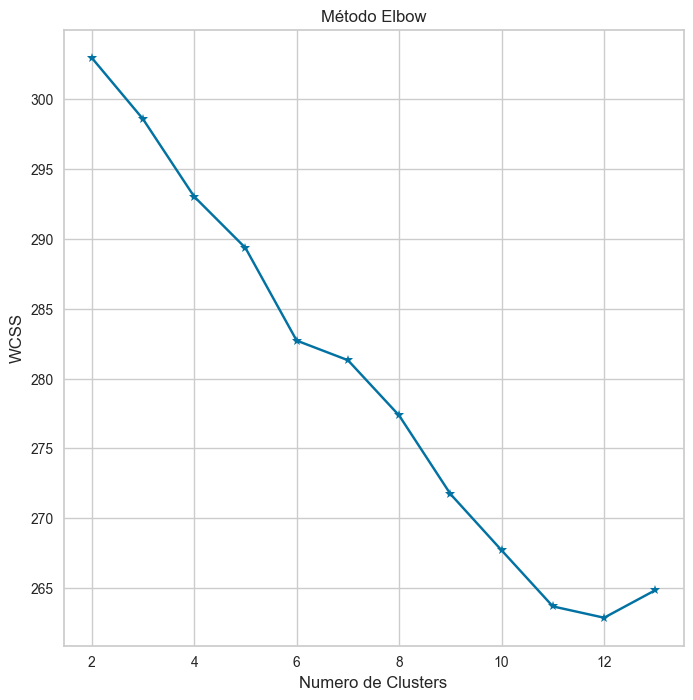

In [217]:
plt.figure(figsize = (8,8))

#plotando o grafico do método elbow
wcss = []

for i in range(2, df_processed.genre.nunique()+1):
  kmeans = KMeans(n_clusters = i, init = 'random')
  kmeans.fit(X)
  print(i, kmeans.inertia_)
  wcss.append(kmeans.inertia_)

plt.plot(range(2, df_processed.genre.nunique()+1), wcss, '*-')
plt.title('Método Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of square


### Método Silhouette

IndexError: index 5 is out of bounds for axis 0 with size 5

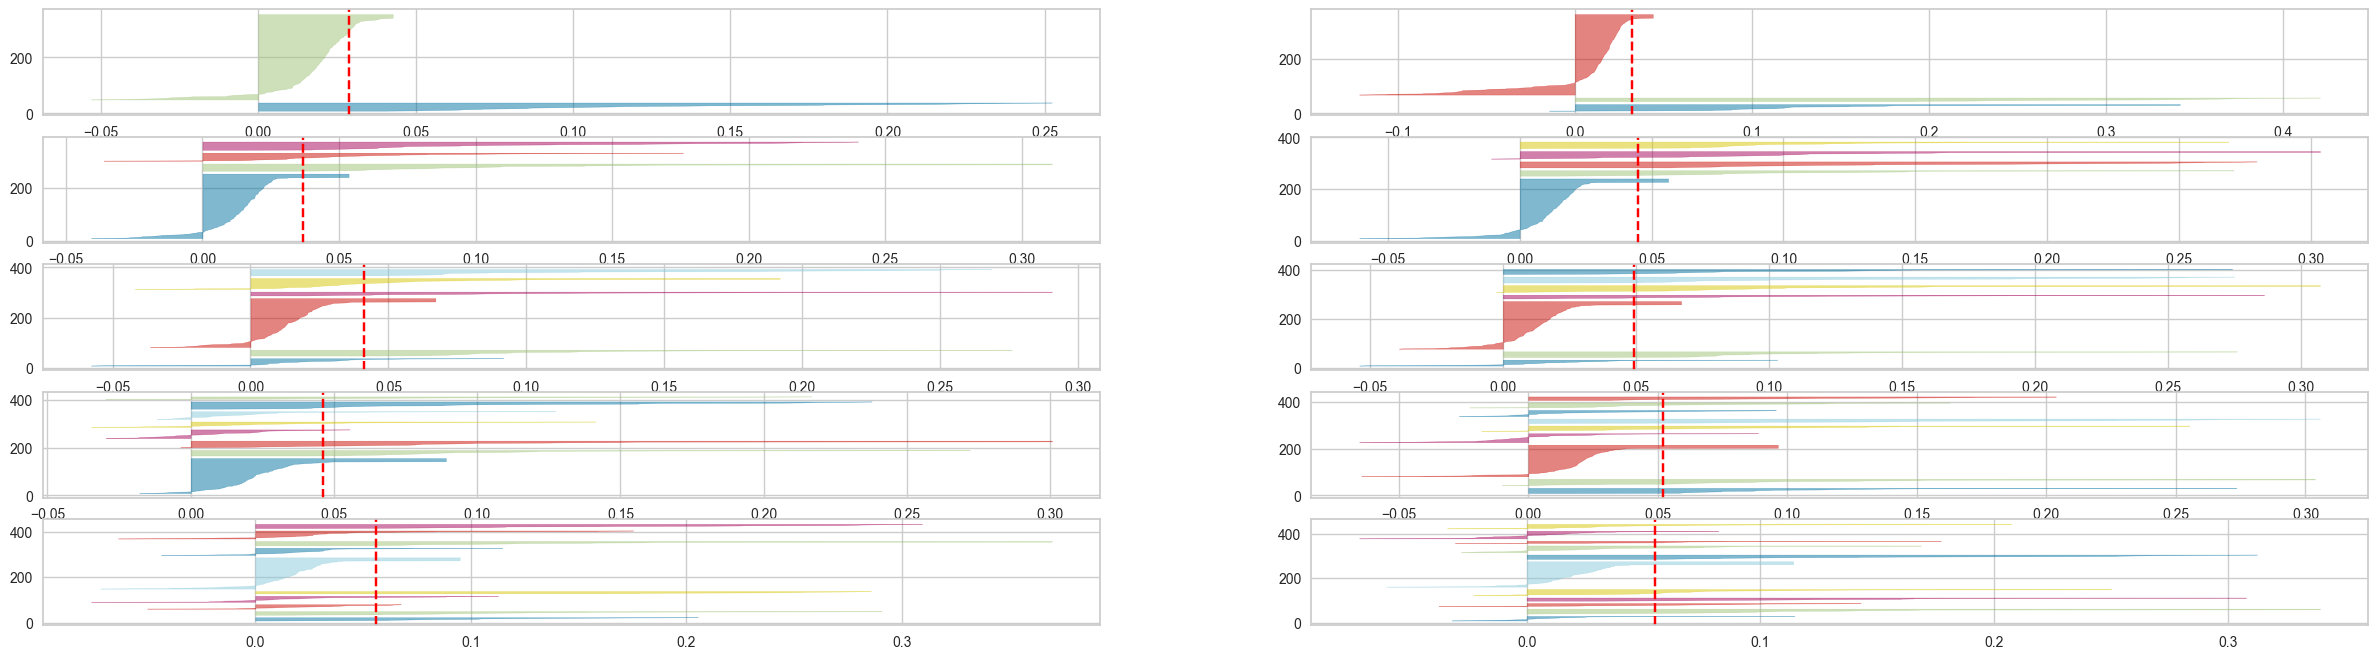

In [218]:
fig, ax = plt.subplots(5,2, figsize = (30,8))
for i in (range(2, df_processed.genre.nunique()+1)):
  #Creating KMeans instance for different number of clusters
  kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 42)
  q, mod = divmod(i,2)

  #Creating SilhouetteVisualizer instance with KMeans instance
  #Fit the visualizer

  visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(X)

In [219]:
df_processed

title_pt                           title_en  year  \
0             Um Sonho de Liberdade           1. Um Sonho de Liberdade  1994   
1                 O Poderoso Chefão               2. O Poderoso Chefão  1972   
2    Batman: O Cavaleiro das Trevas  3. Batman: O Cavaleiro das Trevas  2008   
3              O Poderoso Chefão II            4. O Poderoso Chefão II  1974   
4          12 Homens e uma Sentença        5. 12 Homens e uma Sentença  1957   
..                              ...                                ...   ...   
330                Duna: Parte Dois                   Duna: Parte Dois  2024   
331                    O Rei Macaco                       O Rei Macaco  2023   
332                         Dunkirk                            Dunkirk  2017   
333            Guardiões da Galáxia               Guardiões da Galáxia  2014   
334                         Titanic                            Titanic  1997   

     rating     genre                                            sinopse  \
0       9.3     Drama  dois homens presos se reúnem ao longo de vário...   
1       9.2  Policial  o patriarca idoso de uma dinastia do crime org...   
2       9.0      Ação  quando a ameaça conhecida como o coringa surge...   
3       9.0  Policial  em 1950, michael corleone, agora à frente da f...   
4       9.0  Policial  o julgamento de um assassinato em nova iorque ...   
..      ...       ...                                                ...   
330     NaN      Ação  um menino se torna o messias dos nômades em um...   
331     5.8  Animação  segue um macaco cheio de carisma e seu bastão ...   
332     7.8      Ação  soldados aliados da bélgica, do império britân...   
333     8.0      Ação  um grupo de criminosos intergalácticos deve se...   
334     7.9     Drama  uma aristocrata de dezessete anos se apaixona ...   

     word_count                               sinopse_no_stopwords  
0            21  dois homens presos reunem longo varios anos en...  
1            20  patriarca idoso dinastia crime organizado tran...  
2            33  ameaca conhecida coringa surge passado causa e...  
3            41  1950 michael corleone agora frente familia ten...  
4            29  julgamento assassinato nova iorque frustrado u...  
..          ...                                                ...  
330          21  menino torna messias nomades planeta deserto v...  
331          34  segue macaco cheio carisma bastao magico dois ...  
332          25  soldados aliados belgica imperio britanico fra...  
333          20  grupo criminosos intergalacticos deve unir imp...  
334          20  aristocrata dezessete anos apaixona artista ge...  

[335 rows x 8 columns]

### Metodo Calinski e Davies

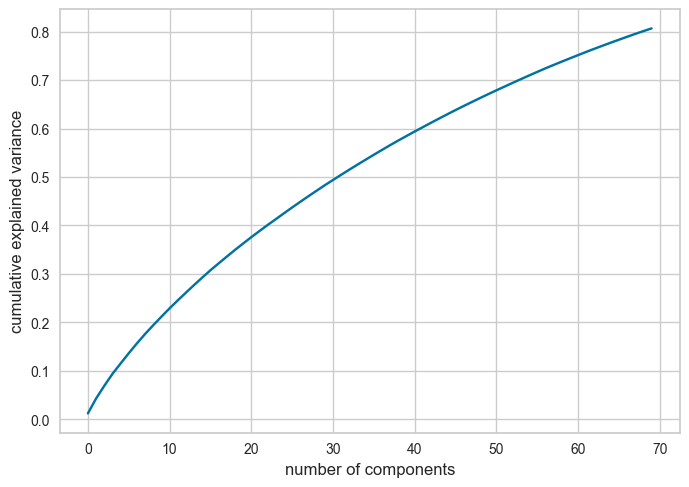

In [220]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=70)
X_reduced = svd.fit_transform(X)

plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [221]:
from sklearn.cluster import KMeans
import os
from shutil import copyfile
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/henricobela/Library/Python/3.

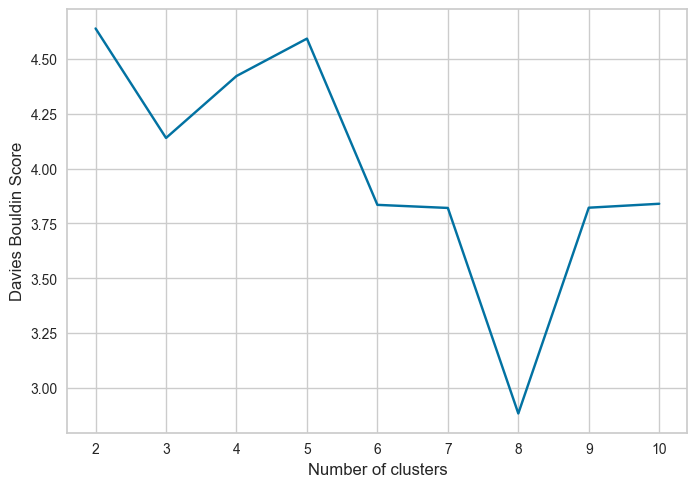

In [222]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(X.toarray())
    db_index = davies_bouldin_score(X.toarray(), labels)
    results.update({i: db_index})

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies Bouldin Score")
plt.show()

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/henricobela/Library/Python/3.

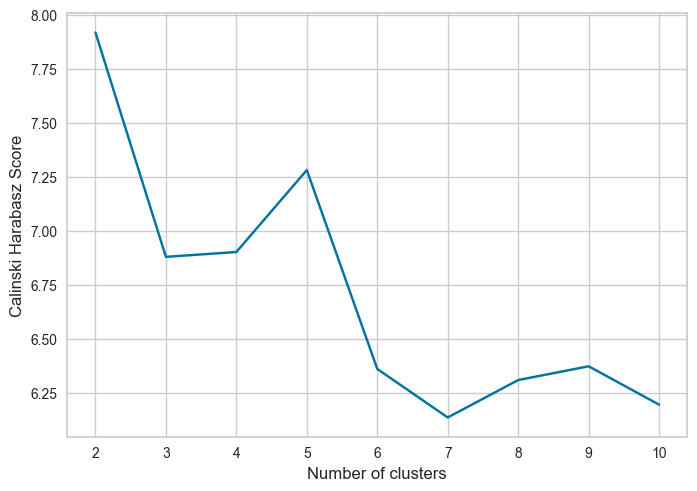

In [223]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(X.toarray())
    db_index = calinski_harabasz_score(X.toarray(), labels)
    results.update({i: db_index})

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski Harabasz Score")
plt.show()

### Análise do número de clusters | k = 10
* Ao analisar os 4 metodos de calculos de cluster, foi decidido que com um numero de 10 clusters, pois com o calculo de calinski resultou em 9 e 10 clusters mais proximos do eixo x. E por conta da quantidade de amostras que temos.

# Comparativo entre os 10 clusters

In [224]:
# initialize kmeans with 5 centroids
kmeans = KMeans(n_clusters = 10, random_state=42)
# fit the model
kmeans = kmeans.fit(X)
#predicting the clusters and store cluster labels in a variable
labels = kmeans.predict(X)
#getting the cluster centers
c = kmeans.cluster_centers_

df_processed['cluster'] = labels
df_processed.head()

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



title_pt                           title_en  year  \
0           Um Sonho de Liberdade           1. Um Sonho de Liberdade  1994   
1               O Poderoso Chefão               2. O Poderoso Chefão  1972   
2  Batman: O Cavaleiro das Trevas  3. Batman: O Cavaleiro das Trevas  2008   
3            O Poderoso Chefão II            4. O Poderoso Chefão II  1974   
4        12 Homens e uma Sentença        5. 12 Homens e uma Sentença  1957   

   rating     genre                                            sinopse  \
0     9.3     Drama  dois homens presos se reúnem ao longo de vário...   
1     9.2  Policial  o patriarca idoso de uma dinastia do crime org...   
2     9.0      Ação  quando a ameaça conhecida como o coringa surge...   
3     9.0  Policial  em 1950, michael corleone, agora à frente da f...   
4     9.0  Policial  o julgamento de um assassinato em nova iorque ...   

   word_count                               sinopse_no_stopwords  cluster  
0          21  dois homens presos reunem longo varios anos en...        8  
1          20  patriarca idoso dinastia crime organizado tran...        0  
2          33  ameaca conhecida coringa surge passado causa e...        5  
3          41  1950 michael corleone agora frente familia ten...        8  
4          29  julgamento assassinato nova iorque frustrado u...        5

## Filmes por cluster

In [225]:
fig = px.bar(df_processed.cluster.value_counts(),
             text_auto = True,
             title = 'Qtd de Filmes por Cluster',
             labels = {'index': 'Cluster #',
                       'value':'Qtd. de Filmes'})
fig.show()

## % de Gêneros por Cluster

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3201: UserWarning:

Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.



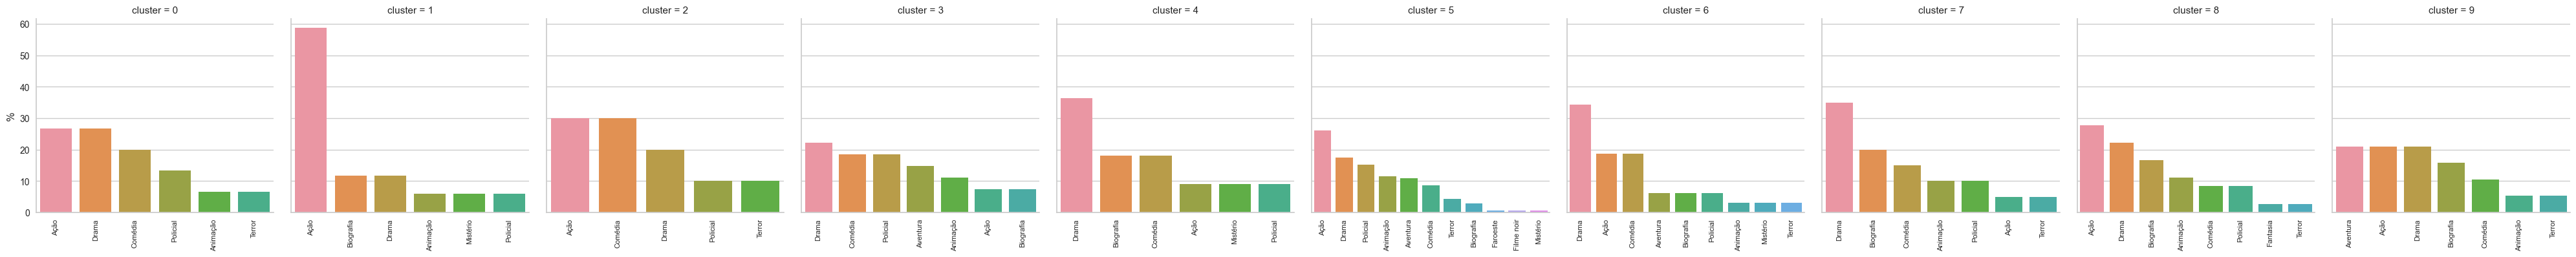

In [226]:
df_plot = df_processed.groupby(['cluster', 'genre'])['title_pt'].count()
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'title_pt':'count'}, inplace = True)
df_plot['%'] = 100 * df_plot['count'] / df_plot.groupby('cluster')['count'].transform('sum')
df_plot = df_plot.sort_values(['cluster', '%'], ascending = False).groupby('cluster').head(11)

fig = sns.catplot(
    data=df_plot, x="genre", y = "%", col="cluster",
    kind="bar", height=4, aspect=1, sharex = False);
fig.set_xlabels('');
fig.set_xticklabels(rotation=90, size = 8);

## Ano de Lançamento por Cluster

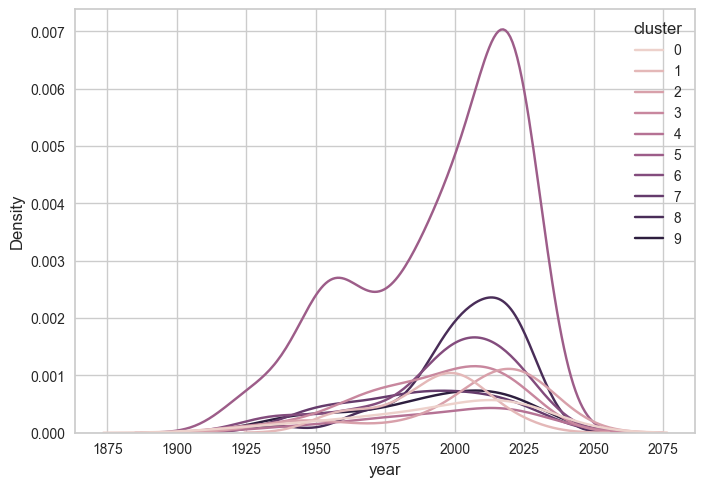

In [227]:
sns.kdeplot(df_processed, x = 'year', hue = 'cluster');

## Radar | Gêneros por Cluster

In [228]:
df_pivot = df_plot.copy()
df_pivot = df_pivot.pivot(index = 'cluster', columns = 'genre', values = '%')
df_pivot.fillna(0, inplace = True)
df_pivot = df_pivot.T.reset_index()
df_pivot.index.name = None
df_pivot

cluster       genre          0          1     2          3          4  \
0          Animação   6.666667   5.882353   0.0  11.111111   0.000000   
1          Aventura   0.000000   0.000000   0.0  14.814815   0.000000   
2              Ação  26.666667  58.823529  30.0   7.407407   9.090909   
3         Biografia   0.000000  11.764706   0.0   7.407407  18.181818   
4           Comédia  20.000000   0.000000  30.0  18.518519  18.181818   
5             Drama  26.666667  11.764706  20.0  22.222222  36.363636   
6          Fantasia   0.000000   0.000000   0.0   0.000000   0.000000   
7          Faroeste   0.000000   0.000000   0.0   0.000000   0.000000   
8        Filme noir   0.000000   0.000000   0.0   0.000000   0.000000   
9          Mistério   0.000000   5.882353   0.0   0.000000   9.090909   
10         Policial  13.333333   5.882353  10.0  18.518519   9.090909   
11           Terror   6.666667   0.000000  10.0   0.000000   0.000000   

cluster          5       6     7          8          9  
0        11.594203   3.125  10.0  11.111111   5.263158  
1        10.869565   6.250   0.0   0.000000  21.052632  
2        26.086957  18.750   5.0  27.777778  21.052632  
3         2.898551   6.250  20.0  16.666667  15.789474  
4         8.695652  18.750  15.0   8.333333  10.526316  
5        17.391304  34.375  35.0  22.222222  21.052632  
6         0.000000   0.000   0.0   2.777778   0.000000  
7         0.724638   0.000   0.0   0.000000   0.000000  
8         0.724638   0.000   0.0   0.000000   0.000000  
9         0.724638   3.125   0.0   0.000000   0.000000  
10       15.217391   6.250  10.0   8.333333   0.000000  
11        4.347826   3.125   5.0   2.777778   5.263158

In [229]:
df_polar = df_pivot.melt(id_vars=['genre'])
df_polar.head()

genre cluster      value
0   Animação       0   6.666667
1   Aventura       0   0.000000
2       Ação       0  26.666667
3  Biografia       0   0.000000
4    Comédia       0  20.000000

In [230]:
fig = px.line_polar(df_polar, r='value', theta='genre', color = 'cluster', line_close=True)
fig.show();

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:271: 

# Nuvem de Palavras por Cluster

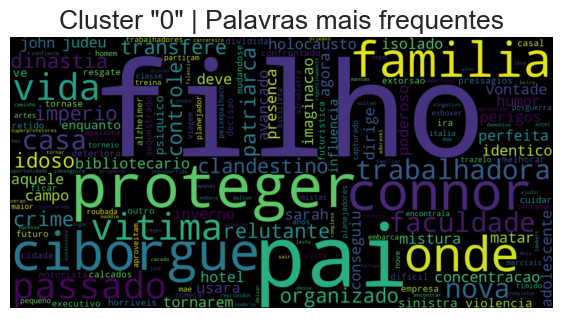

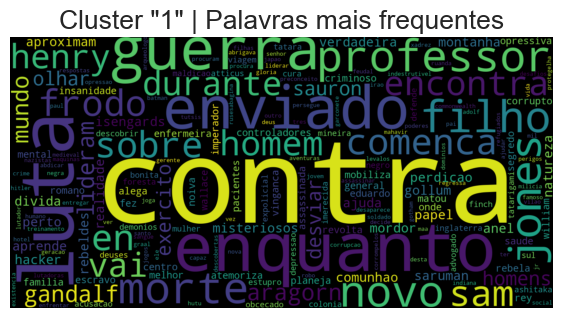

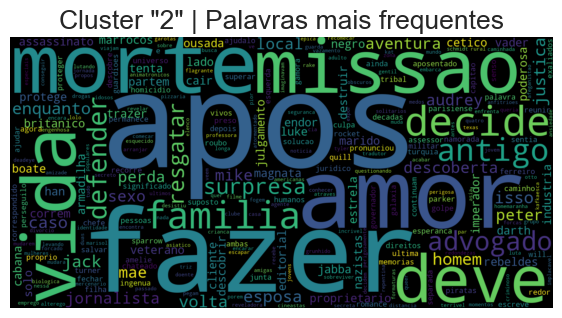

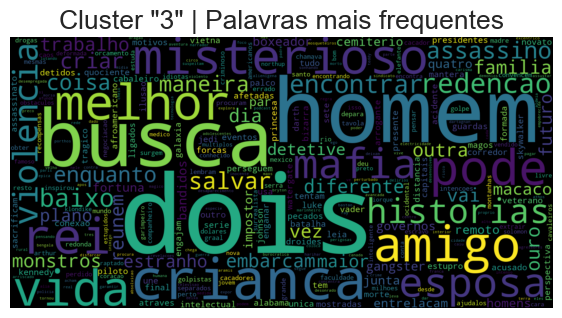

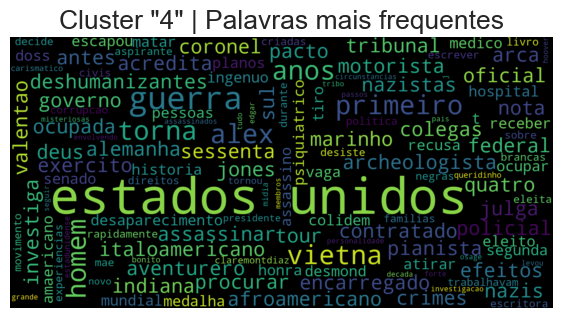

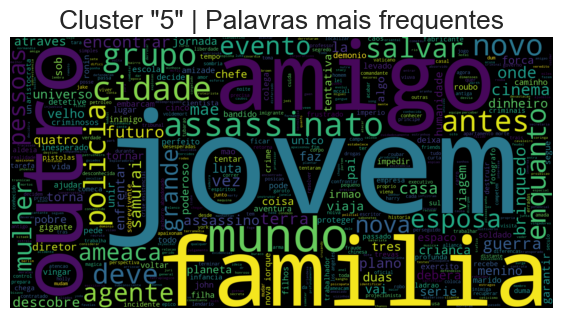

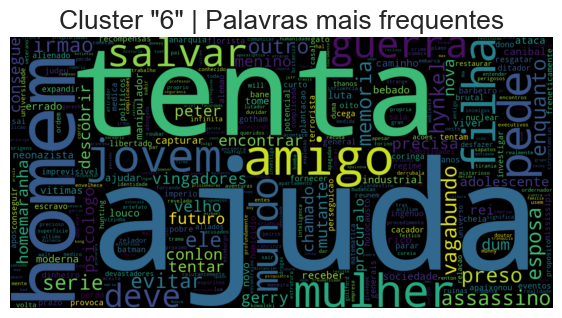

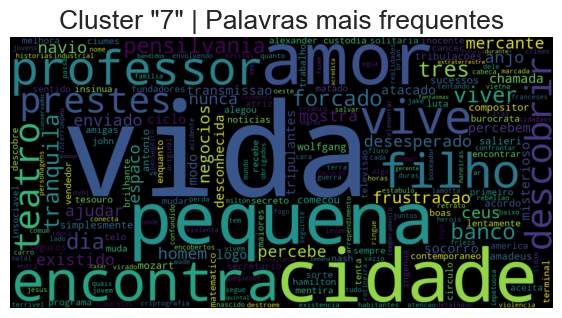

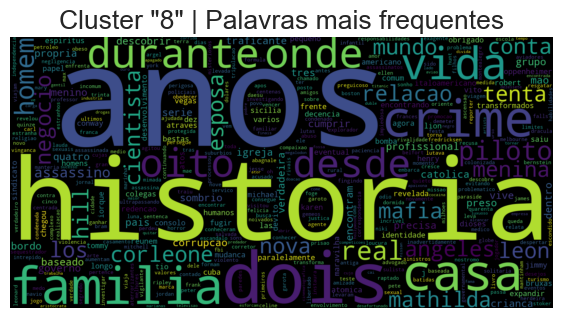

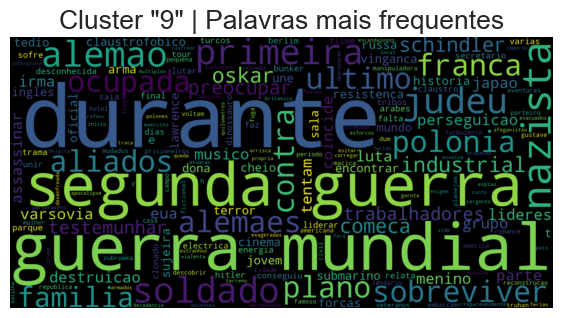

In [231]:
def word_cloud_cluster(cluster:int):
  text = ' '.join([phrase for phrase in df_processed.loc[df_processed.cluster == cluster]['sinopse_no_stopwords']])
  plt.figure(figsize=(7,5), facecolor='None')
  wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Cluster "{cluster}" | Palavras mais frequentes', fontsize = 19)
  plt.show()
  return

for c in range(10):
  word_cloud_cluster(c)

# Considerações Finais
* **Exercício: Reescrever as análises / conclusões devido a atualização da base**

** Na seção "Comparativo entre os 10 clusters" foram apresentadas diferentes formas de caracterizar cada cluster.**

1. Primeiro foi demonstrado que o cluster #2 foi o que apresentou o maior número de amostras (filmes). _(Idealmente os cluster devem conter quantidades balanceadas, porém neste projeto, por ter um dataset com baixo número de amostras (250), não foi possível atender esta premissa)_.

2. Depois foi analisado o % de cada gênero por cluster, sendo os dois gêneros mais representativos do:

  2.1 Cluster 0: Drama, Ação, Biografia, Mistério. Com a maior parte em Drama.

  2.2 Cluster 1: Drama, Ação, Policial, Comédia, Aventura, Animação, Biografia, Terror, Faroeste, Filme Noir, Mistério. Maior fatia em Drama novamente.  

  2.3 Cluster 2: Ação, Biografia, Animação, Drama, Policial. Enfase em Ação para este cluster.

  2.4 Cluster 3: Animação, Drama, Biografia, Ação, Comédia, Policial, Terror. Embora houve bastante linearidade, a Animação prevaleceu

  2.5 Cluster 4: Aventura, Biografia, Drama, Animação, Ação, Comédia. Para os tres primeiros um quase empate, assim como os 3 ultimos. 

  2.6 Cluster 5: Ação, Aventura, Drama, Policial. Neste cluster, houve uma linearidade entre os 3 ultimos porem a Açao obteve a maior parte.

  2.7 Cluster 6: Drama, Biografia, Ação, Comédia, Mistério. Drama novamente com a maior parte!

  2.8 Cluster 7: Ação, Drama, Animação, Aventura. Um empate entre os 2 primeiros e os 2 ultimos.

  2.9 Cluster 8: Drama, Biografia, Comédia, Policial, Animação, Terror. Drama ainda vencendo, talvez, por ser a maior parte de amostras dentro do dataset.

  2.9.1 Cluster 9: Policial, Drama, Biografia, Mistério. Um cluster diferente dos outros, pois apresentou Policial como maior parte.


3. Na sequência foi avaliado a distribuição dos anos de lançamento dos filmes por cluster, sem diferença siginificativa entre eles, com maior concentração ao redor do ano 2000. Apesar de apresentar uma densidade exacerbada para o cluster 0. É possivel que o resultado enorme obtido seja por conta da base de dados desbalanceada, e ou por poucas amostras. 

4. O grafico de radar apresentado, pode ser analisado com os seguintes pontos:

  4.1 Mistério, Noir, e Faroeste quase nao tiveram relevancia para os clusters.
  
  4.2 Terror e Comédia apesar de estarem entre os maiores relevantes, nao apresentaram relevancia na separaçao dos clusters.

  4.3 Os clusters 0 e 2 apresentam muita relevancia para os generos de Drama e Ação, respectivamente.


5. E finalmente, foram apresentadas as nuvens de palavras por cluster, onde em linhas gerais destacam-se:

  5.1 o Cluster 0 -> Plano, Mulher Romance, Berlim. (Acertos para com seu genero principal: Drama)

  5.2 o Cluster 1 -> Filho, Historia, Amor. (Acertos para com seu genero principal: Drama)

  5.3 o Cluster 2 -> Senhor dos Aneis (É possivel identificar que o cluster 2 obteve uma alta taxa de acerto para o genero que mais aparece neste cluster: Açao)

  5.4 o Cluster 3 -> Ronin, Samurai, Jovem, Homem. (Acertos para com seu genero principal: Aventura e Animação)

  5.5 o Cluster 4 -> Segunda Guerra, Nazismo, Guerra. (Este Cluster teve uma alta taxa de acerto para com seu genero, Aventura)

  5.6 o Cluster 5 -> Coringa, Testes, Ciborg, Connor. (Acertos para com seu genero principal: Ação)

  5.7 o Cluster 6 -> Estados unidos, Vietnan, Governo. (Embora este Cluster apresentou poucos acertos para com seu genero: Drama, é possivel que com uma nova leva de dados, possa melhorar)

  5.8 o Cluster 7 -> Redençao, presos, homem, presidentes. (Acertos para com seu genero principal: Ação)

  5.9 o Cluster 8 -> Professor, Amor, Vida, Trabalho, Escola. (Acertos para com seu genero principal: Drama)

  5.9.1 o Cluster 9 -> Esposa, caso, colega, mafia. (Acertos para com seu genero principal: Policial)



** Em resumo neste projeto foram aplicados conceitos de:

1. Webscraping / Crawler para coleta de dados do site IMDb
2. Pré-processamento de texto com utilização de técnicas de NLP, limpeza do texto, lemmatização, remoção de stopwords, remoção de pontuação, remoção de acentuação.
3. Tecnicas e abordagens diferentes para definir o numero adequado de clusters, que, a partir desses resultados, foi denifido que o numero de clusters mais adequado é o de 10 clusters, e conforme acima, foi possivel obter bons resultados, metodos:
  3.1 Metodo Elbow
  3.2 Metodo Silhouette
  3.3 Metodo Davies Bouldin Score
  3.4 Metodo Calinski Harabasz Score
4. Clusterização


Desta forma consideramos que o objetivo inicial foi atingido sendo possível a clusterização dos filmes baseado na sinopse / descrição de cada um, gerando desta forma a possibilidade de recomendar filmes aos usuários não apenas pela classificação tradicional por gêneros, mas também pelos clusters identificados neste projeto.

Os posters dos filmes foram extraidos do site tambem, para que assim, futuramente possamos realizar uma melhor analise com base nas imagens, e tambem, dar um melhor retorno ao solicitante, ao recomendar um filme!
A extraçao dessas imagens de posters foi feita atravez de webscrapping e arrays numpy, onde baixamos a imagem em ioBytes e a convertemos em escala de cinza, posteriormente em array numpy.

**Em termos práticos, se um usuário avalia positivamente um filme, os filmes pertecentes ao mesmo cluster podem ser recomendados a ele.**
